In [228]:
# Manipulatiion DATAFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Graphiques
import seaborn as sns
import plotly.express as px
from pandas.plotting import parallel_coordinates

# Statistiques , mmachine learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# IMPORTATION DU FICHIER A ANALYSER


In [229]:
df = pd.read_csv("df_final2.csv")
df

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,Stabilite Poilitique
0,Afghanistan,1530.0,57000.0,0.0,29000.0,28000.0,36296113.0,-2.80
1,Afrique du Sud,35690.0,2118000.0,63000.0,514000.0,1667000.0,57009756.0,-0.28
2,Albanie,16360.0,47000.0,0.0,38000.0,13000.0,2884169.0,0.38
3,Algérie,6380.0,277000.0,0.0,2000.0,275000.0,41389189.0,-0.92
4,Allemagne,19470.0,1739000.0,646000.0,842000.0,1514000.0,82658409.0,0.59
...,...,...,...,...,...,...,...,...
165,Émirats arabes unis,43470.0,412000.0,94000.0,433000.0,48000.0,9487203.0,0.62
166,Équateur,19310.0,341000.0,0.0,0.0,340000.0,16785361.0,-0.07
167,États-Unis d'Amérique,55680.0,18266000.0,3692000.0,123000.0,21914000.0,325084756.0,0.29
168,Éthiopie,130.0,14000.0,1000.0,1000.0,14000.0,106399924.0,-1.68


## Préparations préalables
- Index / Valeurs
- Normalisation 

### Extraire les données et leurs étiquettes

In [230]:
# On utilise les pays ("Zone") comme index.

df.set_index("Zone", inplace= True)

In [231]:
# Et on sépare les valeurs et les etiquettes

X = df.values
print('X', X.shape, X[:4])

X (170, 7) [[ 1.5300000e+03  5.7000000e+04  0.0000000e+00  2.9000000e+04
   2.8000000e+04  3.6296113e+07 -2.8000000e+00]
 [ 3.5690000e+04  2.1180000e+06  6.3000000e+04  5.1400000e+05
   1.6670000e+06  5.7009756e+07 -2.8000000e-01]
 [ 1.6360000e+04  4.7000000e+04  0.0000000e+00  3.8000000e+04
   1.3000000e+04  2.8841690e+06  3.8000000e-01]
 [ 6.3800000e+03  2.7700000e+05  0.0000000e+00  2.0000000e+03
   2.7500000e+05  4.1389189e+07 -9.2000000e-01]]


In [232]:
#Index = Pays = Y

Y = df.index
print('Y', Y.shape, Y[:4])

Y (170,) Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie'], dtype='object', name='Zone')


### On centre et réduit les données

Centrer et réduire les données permet de mettre les variables a la meme echelle.

In [233]:
# La libraire pour la normalisation des données
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

(170, 7)


# ANALYSE EN COMPOSANTES PRINCIPALES - A

L' ACP permet d’analyser et de visualiser un jeu de données contenant des individus décrits par plusieurs variables quantitatives.

- Utile pour des données muiltivariées
- Permet de visualiser ces données a plus de 3 dimensions dans des nouvelles variables **composantes principales**.
-Elles sont les combinaisons linéaires des variables originelles.

Elle permet **1/** d'étudier la variabilité entre les individus et **2/** d'étudier les liaisons entre les variables.



## Composantes principales - A

In [234]:
# Nombre de composantes
n = 6

pca = PCA(n_components = n)
pca.fit(X_scaled)

PCA(n_components=6)

In [235]:
# Pourcentage de variance captée par les composantes

scree = (pca.explained_variance_ratio_*100).round(1)
scree

array([45. , 22.1, 13. , 10.3,  7.3,  2.3])

In [236]:
# Variance expliquée cumulées
scree_cum = scree.cumsum().round()
scree_cum

array([ 45.,  67.,  80.,  90.,  98., 100.])

In [237]:
x_list = range(1, n+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

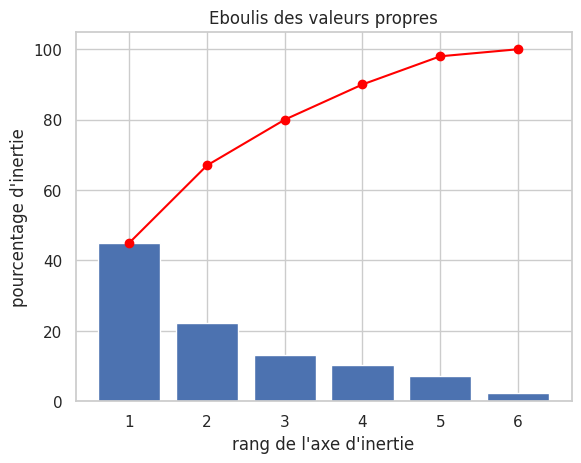

In [238]:
# Graphique des Eboulis des valeurs propres et cumul

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum, c="red" ,marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

## Projection - A



In [239]:
pca = PCA(n_components = 4)
pca.fit(X_scaled)

PCA(n_components=4)

In [240]:
X_proj = pca.transform(X_scaled)

# Sous forme de data frame
X_proj = pd.DataFrame(X_proj, columns = ["F1", "F2", 'F3','F4'])
X_proj[:10]

,F1,F2,F3,F4
0,-0.666430,2.796754,0.136472,-1.357381
1,1.131457,-0.863044,1.958900,-0.618804
2,-0.606468,-0.188746,-0.188357,0.258054
3,-0.523700,1.291877,-0.172536,-0.243418
4,1.811734,-1.319533,3.259343,-1.162913
5,-0.277020,0.382309,1.101722,-0.402781
6,-0.315794,-1.966899,-0.620640,0.491999
7,0.894778,-1.236609,3.023701,-1.189865
8,0.856485,-0.921073,-0.729206,0.172142
9,-0.614257,0.550914,-0.129432,-0.294420


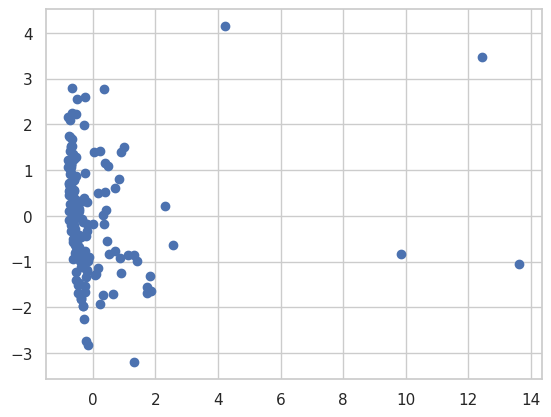

In [241]:
plt.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1])
plt.show(block=False)


On observe 4 points éloignés des autres, **l'ACP est une méthode sensible aux outliers**. Il vont en effet avoir une incidence sur le choix des CP, car les varibales dans lesquels ils sont outliers seront sureprésenté.

On affiche le graphique avec les noms des pays pour les identifier et les supprimer pour l'ACP.

## Outliers 

Nous allons donc indentifer ces outliers, les supprimer des données et recommencer l'ACP.

In [242]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.09, labels[i], fontsize='10', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

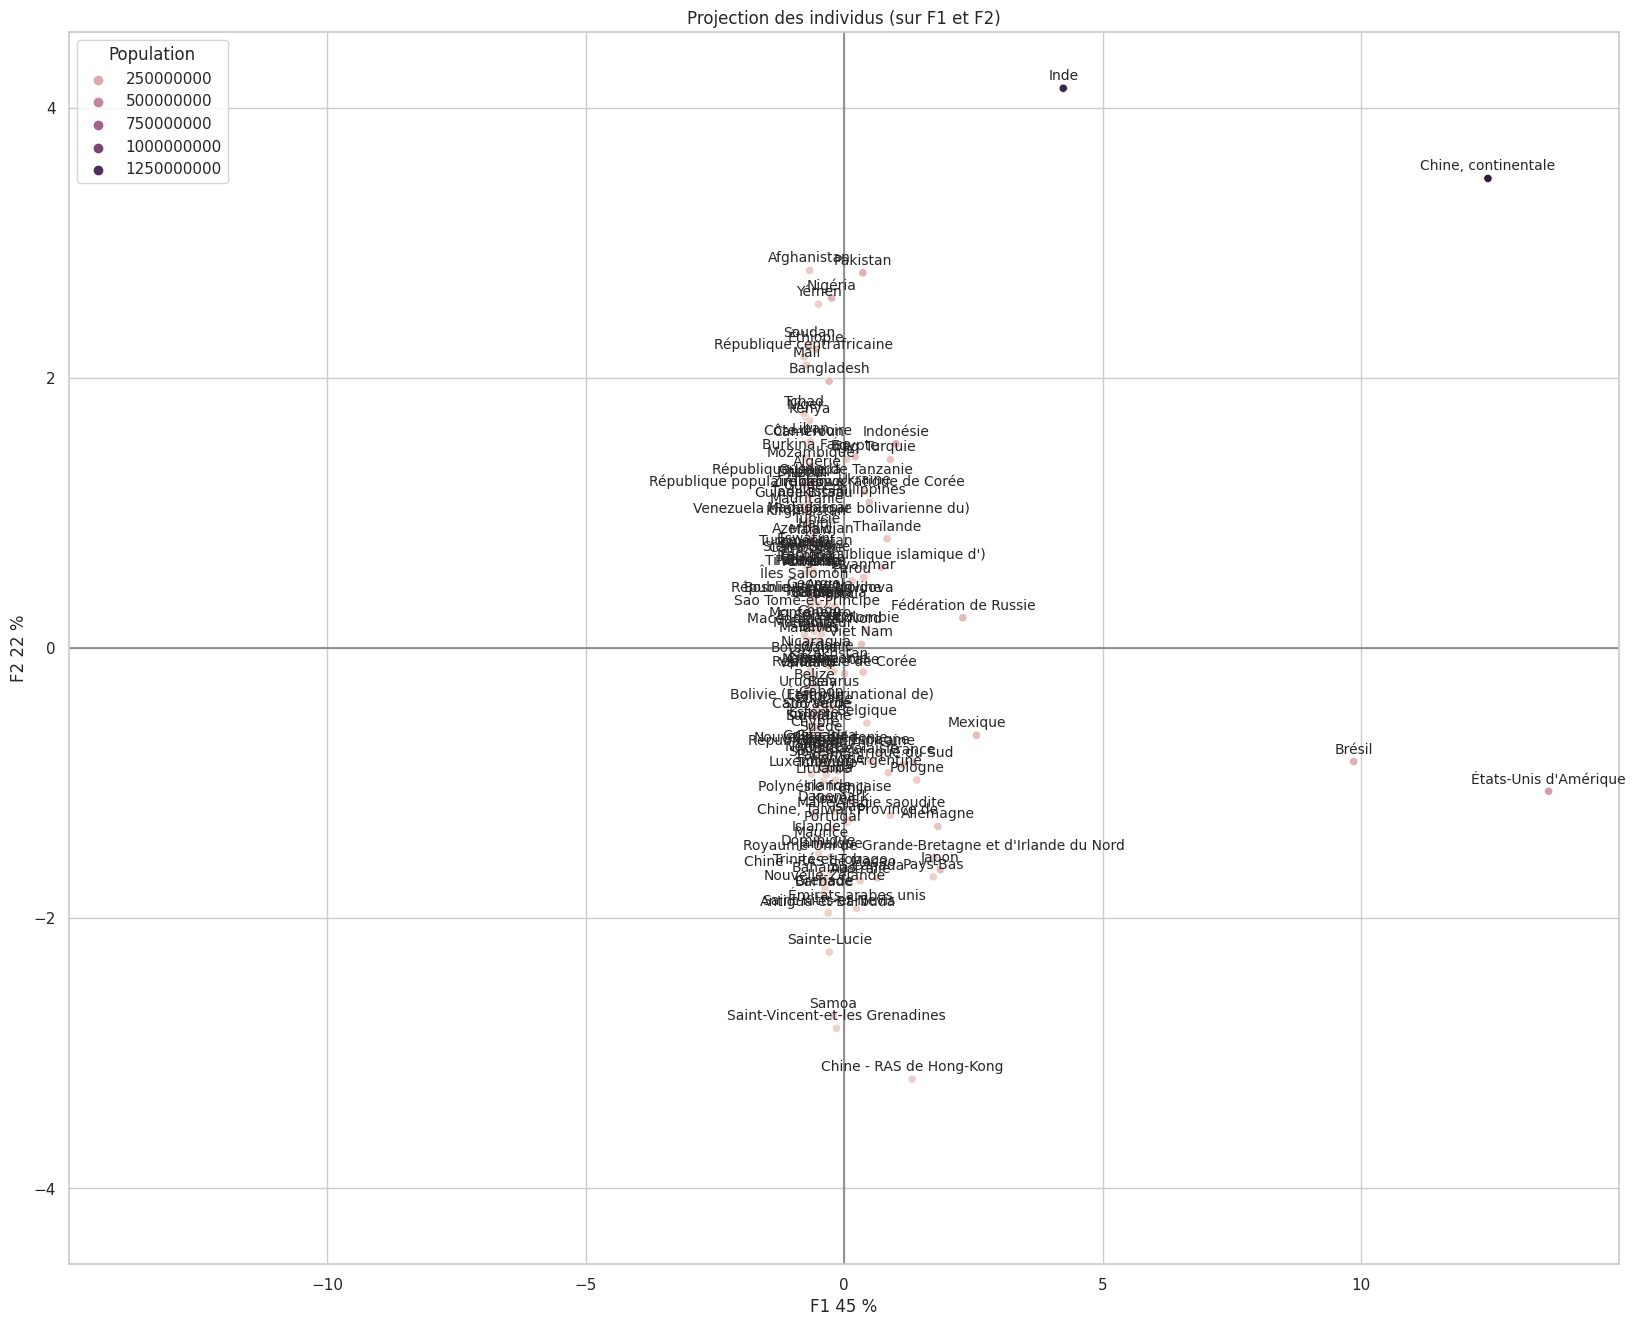

In [243]:
# Projection des pays sur les axes F1 et F2

x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=Y, figsize=(20,16), clusters=df['Population'], marker="o")

In [244]:
list_outliers = ["Brésil", "Chine, continentale", "États-Unis d'Amérique",'Inde']

print("Il s'agit donc de : " + str(list_outliers) )

Il s'agit donc de : ['Brésil', 'Chine, continentale', "États-Unis d'Amérique", 'Inde']


Ce sont des pays avec des populations élevés.

In [245]:
###### COntrole outliers boxplot population ???? 

Nouveau dataframe df2, sans les outliers.

In [246]:
df2 = df.drop(index=["Brésil", "Chine, continentale", "États-Unis d'Amérique",'Inde']).reset_index()
df2.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,Stabilite Poilitique
0,Afghanistan,1530.0,57000.0,0.0,29000.0,28000.0,36296113.0,-2.80
1,Afrique du Sud,35690.0,2118000.0,63000.0,514000.0,1667000.0,57009756.0,-0.28
2,Albanie,16360.0,47000.0,0.0,38000.0,13000.0,2884169.0,0.38
3,Algérie,6380.0,277000.0,0.0,2000.0,275000.0,41389189.0,-0.92
4,Allemagne,19470.0,1739000.0,646000.0,842000.0,1514000.0,82658409.0,0.59


# ANALYSE EN COMPOSANTES PRINCIPALES - **Sans outliers** - df2

## Préparations préalables
- Index / Valeurs
- Normalisation 

### Extraire les données et leurs étiquettes

In [247]:
# On utilise les pays ("Zone") comme index.

df2.set_index("Zone", inplace= True)

In [248]:
# Et on sépare les valeurs et les etiquettes

X = df2.values
print('X', X.shape, X[:4])

X (166, 7) [[ 1.5300000e+03  5.7000000e+04  0.0000000e+00  2.9000000e+04
   2.8000000e+04  3.6296113e+07 -2.8000000e+00]
 [ 3.5690000e+04  2.1180000e+06  6.3000000e+04  5.1400000e+05
   1.6670000e+06  5.7009756e+07 -2.8000000e-01]
 [ 1.6360000e+04  4.7000000e+04  0.0000000e+00  3.8000000e+04
   1.3000000e+04  2.8841690e+06  3.8000000e-01]
 [ 6.3800000e+03  2.7700000e+05  0.0000000e+00  2.0000000e+03
   2.7500000e+05  4.1389189e+07 -9.2000000e-01]]


In [249]:
#Index = Pays = Y

Y = df2.index
print('Y', Y.shape, Y[:4])

Y (166,) Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie'], dtype='object', name='Zone')


### On centre et réduit les données

Centrer et réduire les données permet de mettre les variables a la meme echelle.

In [250]:
# La libraire pour la normalisation des données
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

(166, 7)


In [251]:
# On vérifie que la moyenne est bien égale à 0 et la variance à 1.

idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Composantes principales 

On calcul nos CP et on cherche le nombre de CP a utilisé pour représenter nos données.

A partir des éboulis de la variance :     

  -Methode du coude 

  -Pourcentange de la variance expliquée par les CP

In [252]:

# Nombre de composantes
n = 6

pca = PCA(n_components = n)
pca.fit(X_scaled)

PCA(n_components=6)

In [253]:
# Pourcentage de variance captée par les composantes

scree = (pca.explained_variance_ratio_*100).round(1)
scree

array([43.5, 24.6, 12.9,  8. ,  6.7,  4.1])

In [254]:
# Variance expliquée cumulées
scree_cum = scree.cumsum().round()
scree_cum

array([ 44.,  68.,  81.,  89.,  96., 100.])

In [255]:
x_list = range(1, n+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

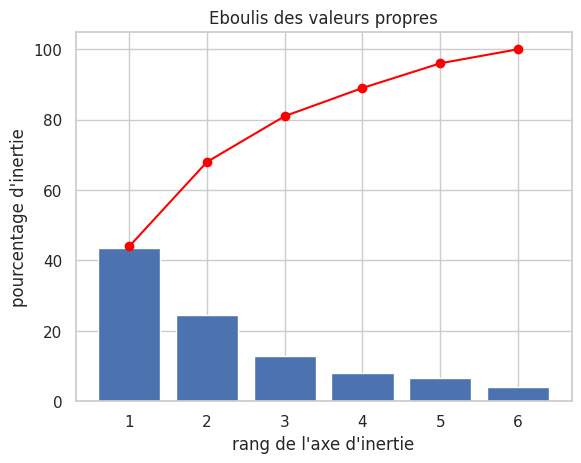

In [256]:
# Graphique des Eboulis des valeurs propres et cumul

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum, c="red" ,marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

SELON ANALYSE

Nous n'avons pas réelement de cassure dans la courbe de eboulis, donc nous n'utilisons pas la méthode du coude, pour choisir le nombre de nos composantes principales.

Je choisis de prendre 4 composantes elles représentent 90% de la variance.

---

Avant de passer a l'analyse des CP :

On réentraine les données avec 4 composantes

In [257]:
n=4

#
pca = PCA(n_components = n)
pca.fit(X_scaled)

#
x_list = range(1, n+1)
list(x_list)

[1, 2, 3, 4]

### Projection simple 



In [258]:
# Nous allons maintenant calculer les coordonnées de nos individus dans le nouvel espace projectif :

X_proj = pca.transform(X_scaled)

# Sous forme de data frame
X_proj = pd.DataFrame(X_proj, columns = ["F1", "F2", 'F3','F4'])
X_proj[:10]

,F1,F2,F3,F4
0,-0.426361,2.883128,0.635264,0.061333
1,3.624242,-0.679380,-0.765125,1.129083
2,-1.042124,-0.213709,0.041262,0.166396
3,-0.246335,1.467781,0.133467,-0.077896
4,4.847249,-1.762733,2.712422,1.265488
5,0.011337,0.469719,0.475261,1.195563
6,-0.991927,-1.865034,-1.172325,-0.395621
7,2.476916,-1.126813,-0.298462,2.467250
8,2.915004,-0.915198,-1.226597,-1.685340
9,-0.942615,0.502987,0.129944,0.087553


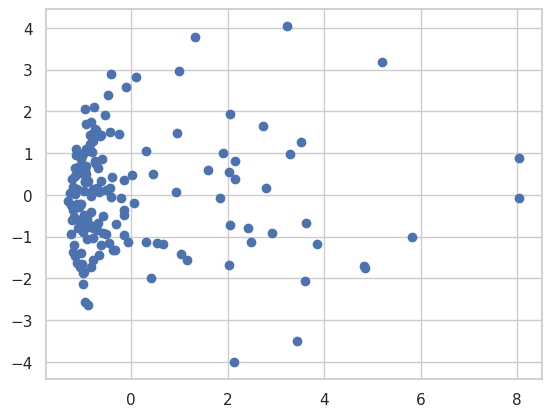

In [259]:
# Représentation graphique simple, sur les 2 premières CP

plt.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1])
plt.show(block=False)


Nous avons cette fois ci un nuage de point moins éclaté sans les outliers.

### Analyse des composantes principales

In [260]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
print(pcs.shape)
pcs

(4, 7)


,0,1,2,3,4,5,6
0,0.092249,0.540913,0.269153,0.380555,0.538426,0.426812,-0.097805
1,-0.579925,0.010120,-0.270970,-0.243859,-0.003758,0.360507,-0.633019
2,-0.477805,-0.262690,0.753128,0.299153,-0.154724,-0.127684,-0.075895
3,-0.189640,0.023628,-0.485992,0.800607,-0.286087,-0.020862,0.063543


In [261]:

features =  df2.columns 
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,Stabilite Poilitique
F1,0.09,0.54,0.27,0.38,0.54,0.43,-0.10
F2,-0.58,0.01,-0.27,-0.24,-0.00,0.36,-0.63
F3,-0.48,-0.26,0.75,0.30,-0.15,-0.13,-0.08
F4,-0.19,0.02,-0.49,0.80,-0.29,-0.02,0.06


In [262]:
pcs.T

,F1,F2,F3,F4
Disponibilité alimentaire en quantité (kg/personne/an),0.092249,-0.579925,-0.477805,-0.189640
Disponibilité intérieure,0.540913,0.010120,-0.262690,0.023628
Exportations - Quantité,0.269153,-0.270970,0.753128,-0.485992
Importations - Quantité,0.380555,-0.243859,0.299153,0.800607
Production,0.538426,-0.003758,-0.154724,-0.286087
Population,0.426812,0.360507,-0.127684,-0.020862
Stabilite Poilitique,-0.097805,-0.633019,-0.075895,0.063543


<Axes: >

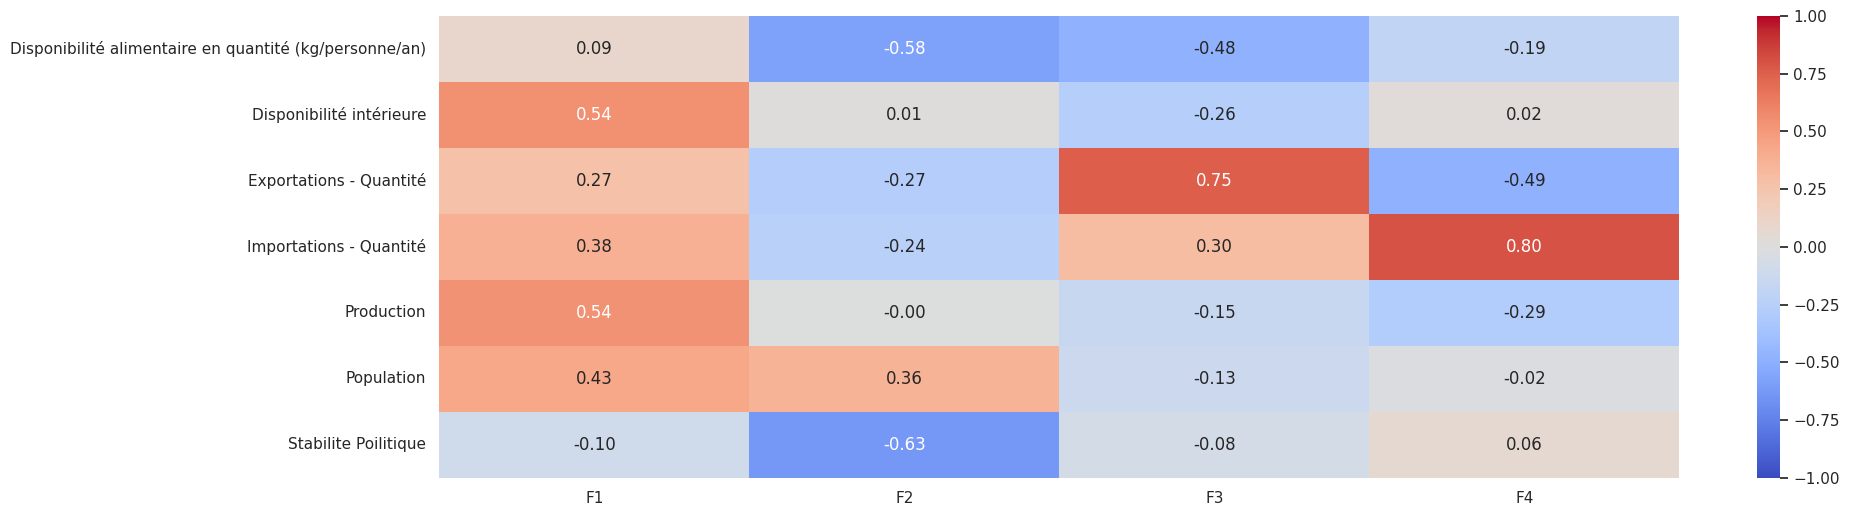

In [263]:
# Avec le heatmap, on arrive a distinguer quelle variables 'contibuent' a chaque CP, en rouge positivement en bleu negativement.

fig, ax = plt.subplots(figsize=(20, 6))

sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

SELON ANALYSE

On 

## Le/les cercles de corréaltion

Le cercle de corrélation est un outil utile pour comprendre les corrélations entre les variables et les composantes principales dans une ACP.

### Code graph cercle de corrélation

In [264]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y =  x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.04,
                head_length=0.05, 
                width=0.006, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
  

    # affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))


    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

### Visualisation Cercle de coorélation

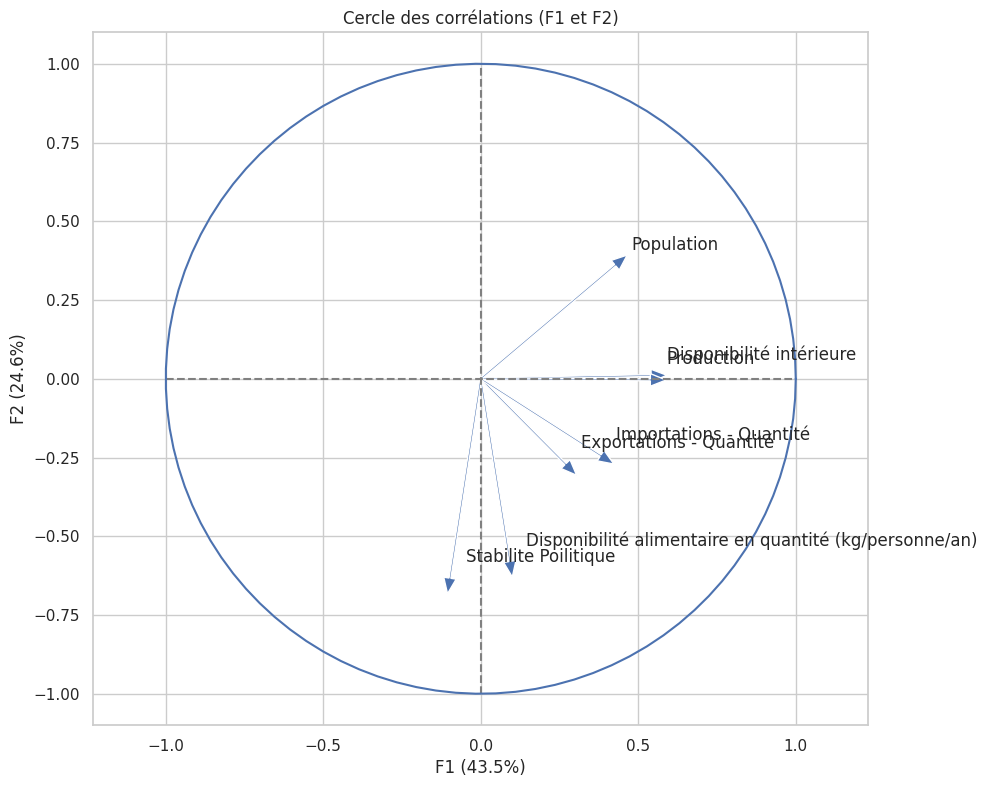

In [265]:
# Dans l'espace F1 F2

x_y = (0,1)

correlation_graph(pca,  x_y, features)

SELON ANALYSE

F1 :
- Les variables **Dispo Intérieure** et **Production** sont les plus fortement corrélé avec la composantes F1 
 
- Les varialbles Importations, Exportations et Population sont positivement corrélées à F1


F2 :
- Les variables Dispo alimentaire et Stabilité politique ,
sont anticorrélées à F2

Autre :
Sur une projection des individus sur ces axes, nous pourront egalement voir quels pays sont les plus peuplés. Ils auront tendances à être situés en haut a droite du graph.

ON retrouve les memes analyse que l'on pouvait faire avec le heat map.

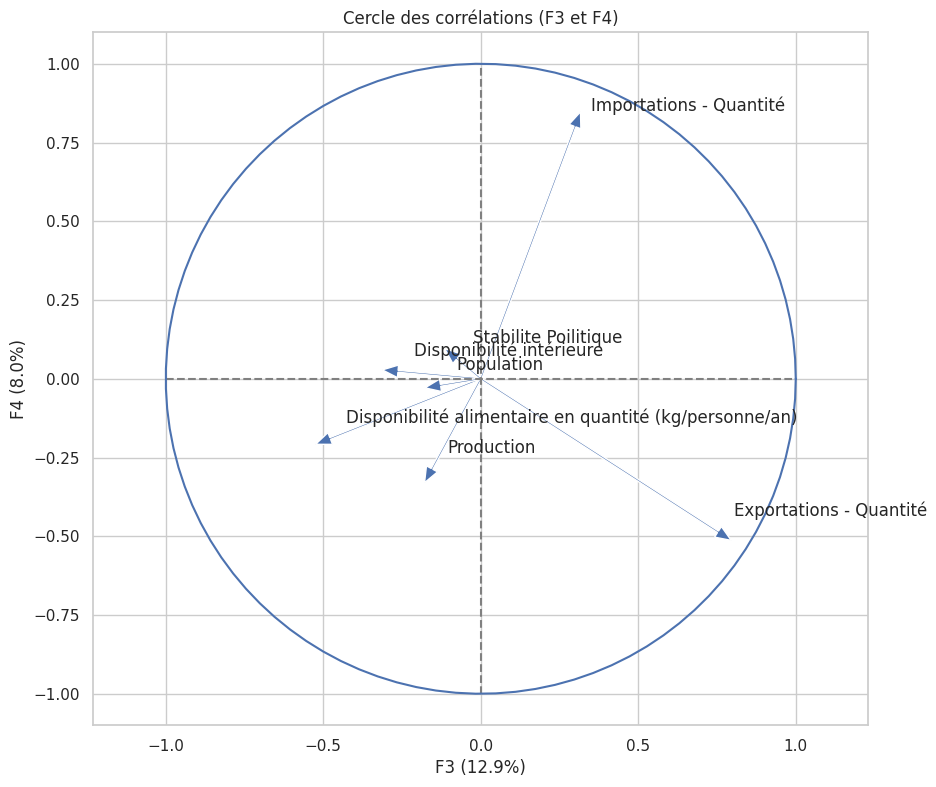

In [266]:
# Dans l'espace F3 F4

x_y = (2,3)

correlation_graph(pca,  x_y, features)

expliquer

## Projection des individus sur les axes des CP


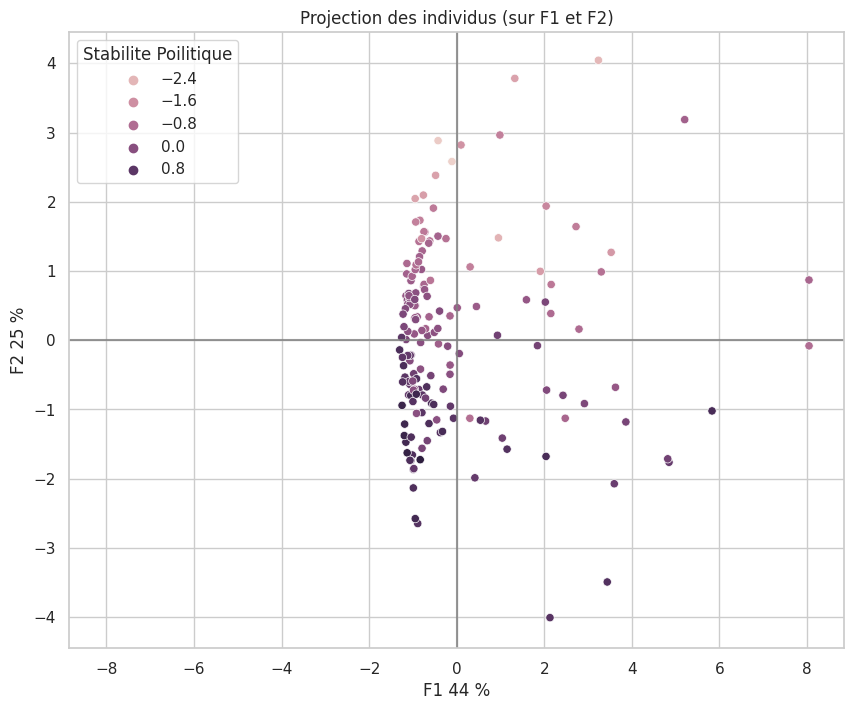

In [267]:
x_y = [0,1]

display_factorial_planes(   X_proj, x_y, pca ,  labels = None, 
                         clusters=df2['Stabilite Poilitique'], 
                         alpha=1,  figsize=[10,8],  marker="." )


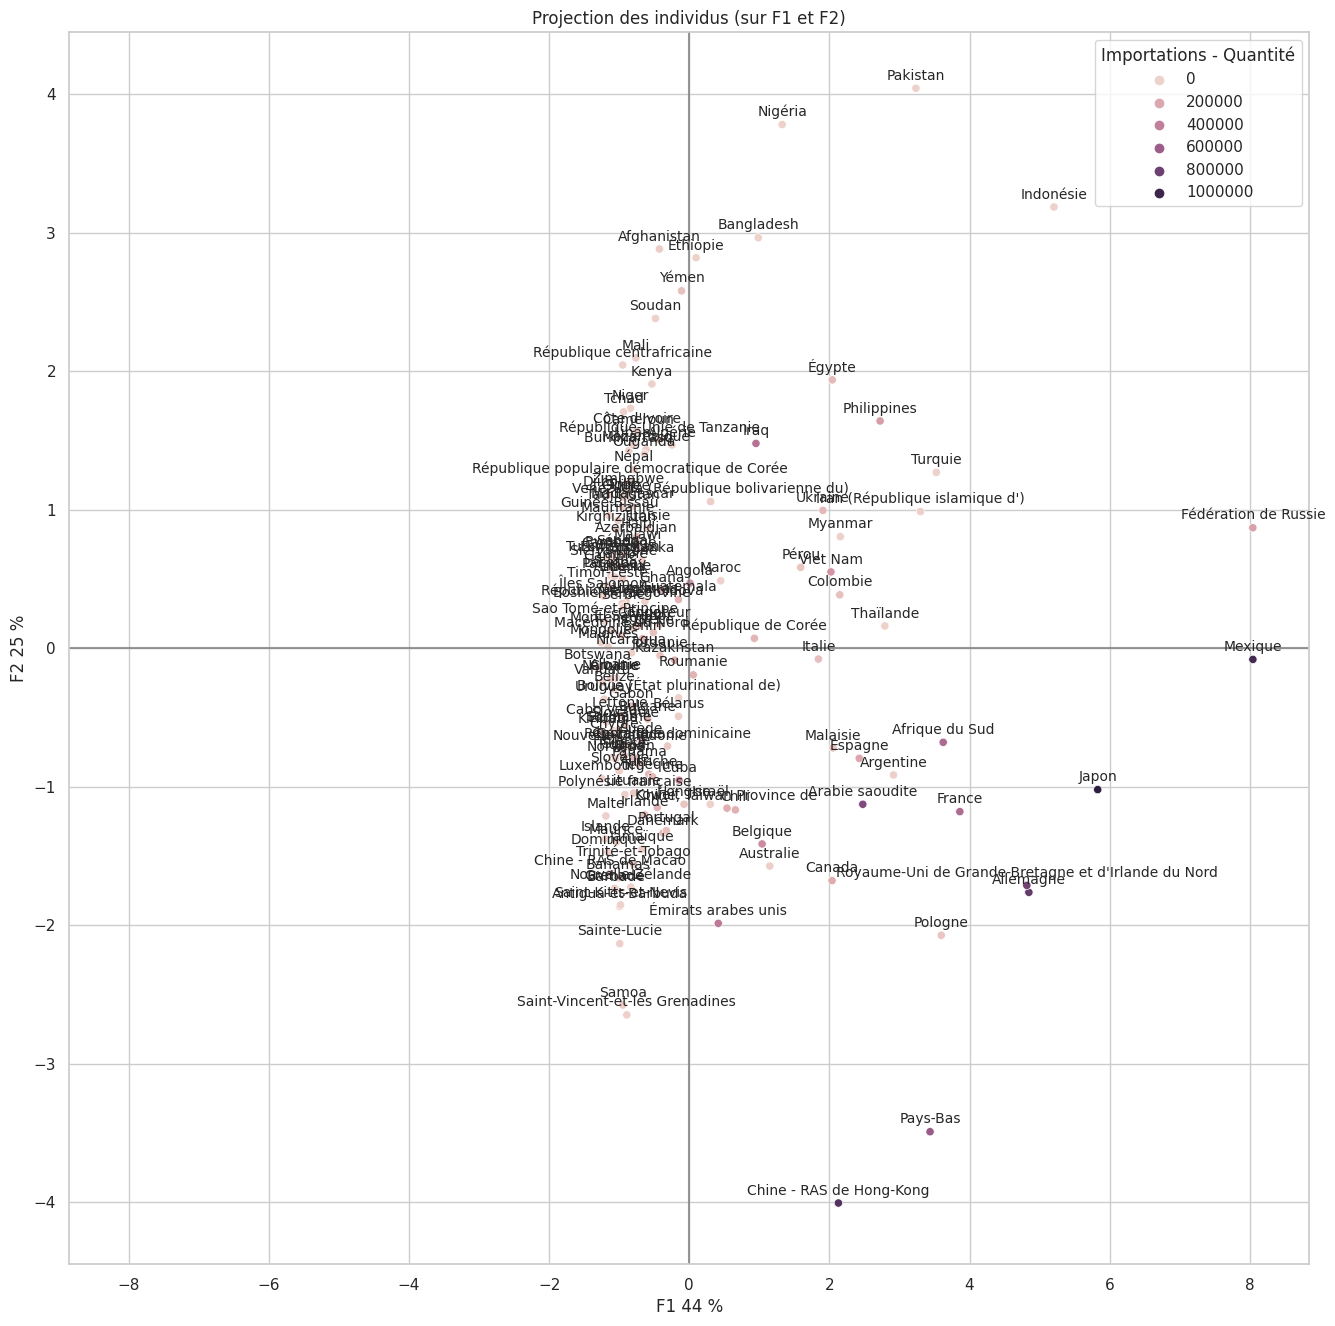

In [268]:


x_y = [0,1]

display_factorial_planes(X_proj, x_y, pca, labels=Y, figsize=(16,16), clusters=df2['Importations - Quantité'], marker="o")


SELON ANALYSE

Ici nous pouvons donc voir quels pays ont une plus ou moins grande disponibilité intérieuer/production de Volailles.

Lesquels ont une stabilité politique forte seront en dessous de l'axe F2 et également pour la disponibilité aliemntaire de vollailes par personne.

---

Exemple  :

La Pologne l'Allemagne et le R-U, le Canada, la France et le Japon ,sont des pays avec une bonne stabilité politique, aisni qu' une bonne dsiponibilité par habitant.

Et avec une grande disponibilité interieur et production de volailles.

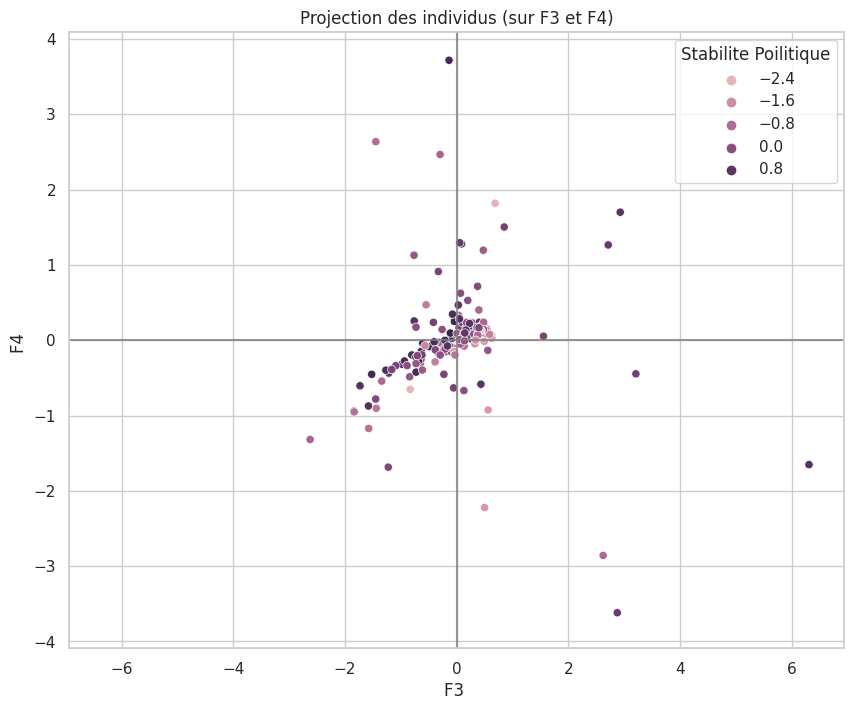

In [269]:
x_y = [2,3]

display_factorial_planes(   X_proj, x_y, pca=None,  labels = None, clusters=df2['Stabilite Poilitique'],  alpha=1,  figsize=[10,8] )

SELON ANALYSE EXPLIQUER

### biplot

In [270]:
import matplotlib.pyplot as plt

from scipy.spatial import ConvexHull

import numpy as np

import pandas as pd

import matplotlib as mpl

import matplotlib.cm as cm

import seaborn as sns

from sklearn.decomposition import PCA

def biplot(pca=[],x=None,y=None,components=[0,1],score=None,coeff=None,coeff_labels=None,score_labels=None,circle='T',bigdata=1000,cat=None,cmap="viridis",density=True):

    if isinstance(pca,PCA)==True :

        coeff = np.transpose(pca.components_[components, :])

        score=  pca.fit_transform(x)[:,components]

        if isinstance(x,pd.DataFrame)==True :

            coeff_labels = list(x.columns)

    if score is not None : x = score

    if x.shape[1]>1 :

        xs = x[:,0]

        ys = x[:,1]

    else :

        xs = x

        ys = y

    if (len(xs) != len(ys)) : print("Warning ! x et y n'ont pas la même taille !")

    scalex = 1.0/(xs.max() - xs.min())

    scaley = 1.0/(ys.max() - ys.min())

    #x_c = xs * scalex

    #y_c = ys * scaley

    temp = (xs - xs.min())

    x_c = temp / temp.max() * 2 - 1

    temp = (ys - ys.min())

    y_c = temp / temp.max() * 2 - 1

    data = pd.DataFrame({"x_c":x_c,"y_c":y_c})

    print("Attention : pour des facilités d'affichage, les données sont centrées-réduites")

    if cat is None : cat = [0]*len(xs)

    elif len(pd.Series(cat)) == 1 : cat = list(pd.Series(cat))*len(xs)

    elif len(pd.Series(cat)) != len(xs) : print("Warning ! Nombre anormal de catégories !")

    cat = pd.Series(cat).astype("category")

    fig = plt.figure(figsize=(6,6),facecolor='w') 

    ax = fig.add_subplot(111)

    # Affichage des points

    if (len(xs) < bigdata) :   

        ax.scatter(x_c,y_c, c = cat.cat.codes,cmap=cmap)

        if density==True : print("Warning ! Le mode density actif n'apparait que si BigData est paramétré.")

    # Affichage des nappes convexes (BigData)

    else :

        #color

        norm = mpl.colors.Normalize(vmin=0, vmax=(len(np.unique(cat.cat.codes)))) #-(len(np.unique(c)))

        cmap = cmap

        m = cm.ScalarMappable(norm=norm, cmap=cmap)

        if density==True :

            sns.set_style("white")

            sns.kdeplot(x="x_c",y="y_c",data=data)

            if len(np.unique(cat)) <= 1 :

                sns.kdeplot(x="x_c",y="y_c",data=data, cmap="Blues", shade=True, thresh= 0)

            else :

                for i in np.unique(cat) :

                    color_temp = m.to_rgba(i)

                    sns.kdeplot(x="x_c",y="y_c",data=data[cat==i], color=color_temp,

                                shade=True, thresh=0.25, alpha=0.25)     

        for cat_temp in cat.cat.codes.unique() :

            x_c_temp = [x_c[i] for i in range(len(x_c)) if (cat.cat.codes[i] == cat_temp)]

            y_c_temp = [y_c[i] for i in range(len(y_c)) if (cat.cat.codes[i] == cat_temp)]

            points = [ [ None ] * len(x_c_temp) ] * 2

            points = np.array(points)

            points = points.reshape(len(x_c_temp),2)

            points[:,0] = x_c_temp

            points[:,1] = y_c_temp

            hull = ConvexHull(points)

            temp = 0

            for simplex in hull.simplices:

                color_temp = m.to_rgba(cat_temp)

                plt.plot(points[simplex, 0], points[simplex, 1],color=color_temp)#, linestyle='dashed')#linewidth=2,color=cat)

                if (temp == 0) :

                     plt.xlim(-1,1)

                     plt.ylim(-1,1)

                     temp = temp+1

    if coeff is not None :

        if (circle == 'T') :

            x_circle = np.linspace(-1, 1, 100)

            y_circle = np.linspace(-1, 1, 100)

            X, Y = np.meshgrid(x_circle,y_circle)

            F = X**2 + Y**2 - 1.0

            #fig, ax = plt.subplots()

            plt.contour(X,Y,F,[0])

        n = coeff.shape[0]

        for i in range(n):

            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5,

                      head_width=0.05, head_length=0.05)

            if coeff_labels is None:

                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')

            else:

                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, coeff_labels[i], color = 'g', ha = 'center', va = 'center')

        if score_labels is not None :

            for i in range(len(score_labels)) :

                temp_x = xs[i] * scalex

                temp_y = ys[i] * scaley

                plt.text(temp_x,temp_y,list(score_labels)[i])

    plt.xlim(-1.2,1.2)

    plt.ylim(-1.2,1.2)

    plt.xlabel("PC{}".format(1))

    plt.ylabel("PC{}".format(2))

    plt.grid(linestyle='--')

    plt.show()

## Graph cercle de corrélation + projection des individus

Ici, une comibnaison des deux visualisation qui permet la meme analyse grace au composantes principales et le cercle de corrélation.

Attention : pour des facilités d'affichage, les données sont centrées-réduites


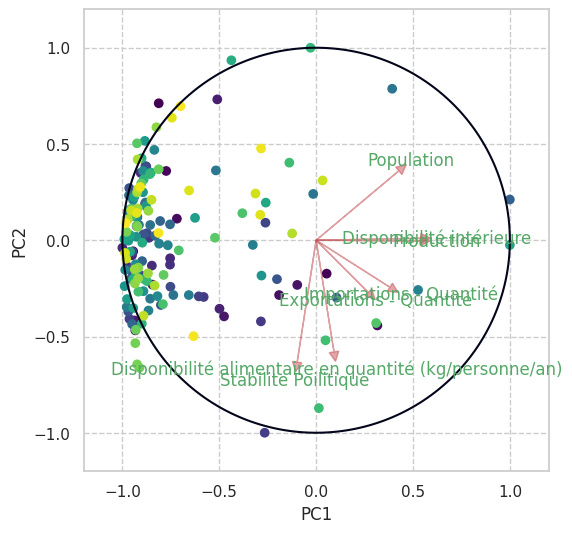

In [271]:
#

biplot( pca ,x=X_scaled, cat=Y , components=[0,1], coeff_labels = features  ,density=False)

plt.show()

Attention : pour des facilités d'affichage, les données sont centrées-réduites


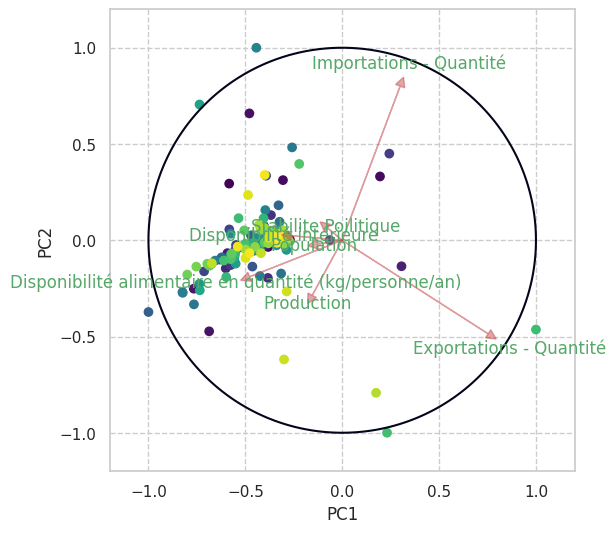

In [272]:
#
biplot( pca ,x=X_scaled, cat=Y , components=[2,3], coeff_labels = features  ,density=False)

plt.show()

# CLUSTERING

Le clustering est une technique d'analyse de données non supervisée qui consiste à regrouper des individus (ou des variables) similaires en clusters. L'objectif est de trouver des structures ou des regroupements naturels dans les données sans connaître à l'avance les classes ou les groupes auxquels appartiennent les individus.


Il existe plusieurs type de clustering , notamment le clustering hierarchique et l'agorithme des k-means.

#  CAH - Clustering Ascendant Hiérarchique

## Dendrogramme

On utilise ici la méthode de ward pour créer notre dendrogramme en minimisant l'écart intra-classe des clusters.

Text(0, 0.5, 'Distance.')

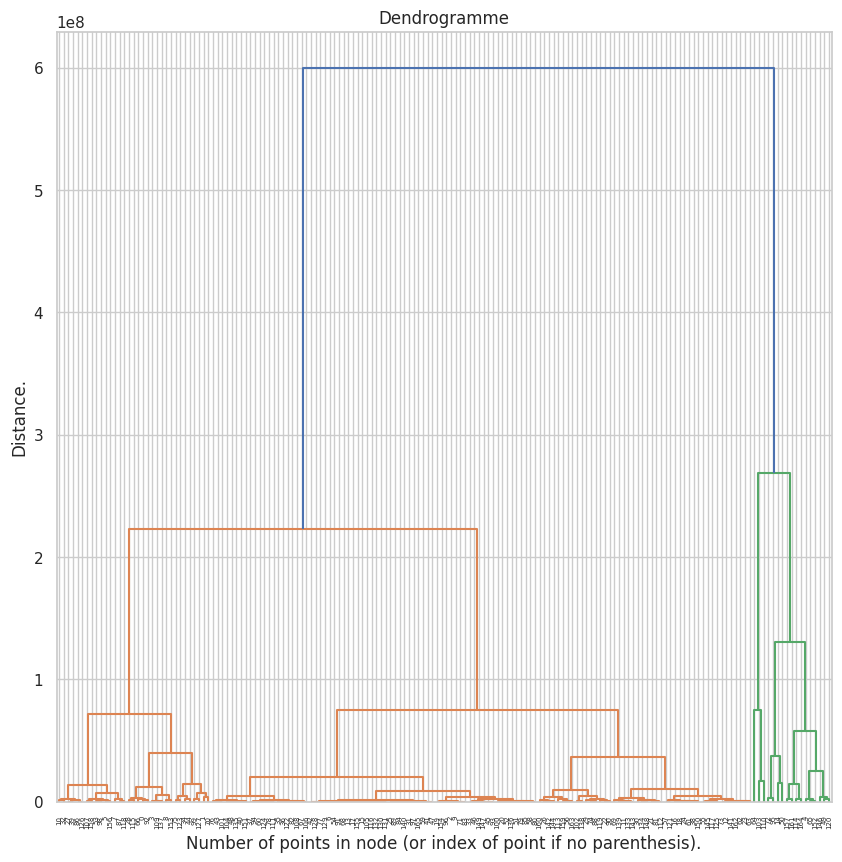

In [273]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import AgglomerativeClustering

# Calcul des distances avec la méthode Ward

Z = linkage(X, method ='ward')


# Dendrogramme
plt.figure(figsize =(10, 10))
D1 = dendrogram(Z)
plt.title("Dendrogramme")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")

On distingue que des groupes se détachent à partir de ce dendrogramme.
Rendons le plus lisible.

Text(0, 0.5, 'Distance.')

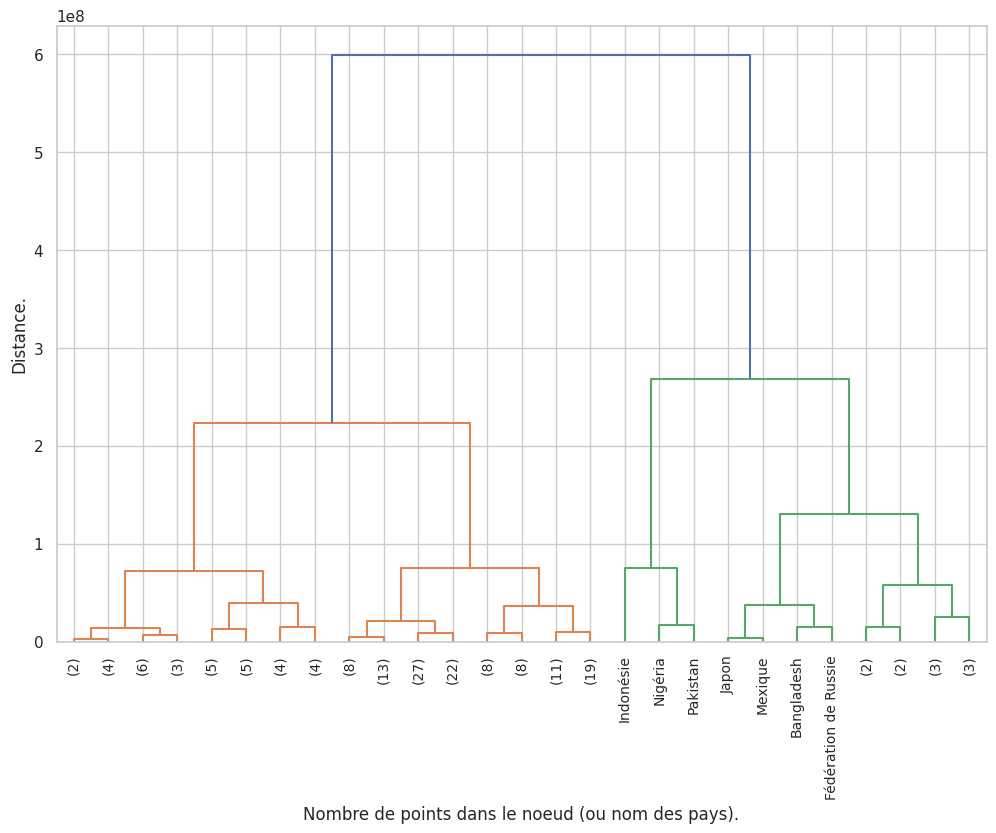

In [274]:
# On tronque le dendrogramme pour plus de visibilité

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
D2 = dendrogram(Z, p=4, truncate_mode="level",  ax=ax,labels=Y, leaf_rotation=90)

plt.xlabel("Nombre de points dans le noeud (ou nom des pays).")
plt.ylabel("Distance.")

On peut voir sur le dendrogramme qu'il y a deux grands groupes 'clusters' qui se dessinent, mais on peut voir aussi que ces deux derniers ce séparent en 2 également. Essayons d'étudier cela.

## Nombre de classes

On cherche ou couper l'arbre pour avoir un nombre de cluster optimal, on regarde où est ce qu'il y a un/des saut(s) important d'inertie.

Text(0, 0.5, 'Inertie')

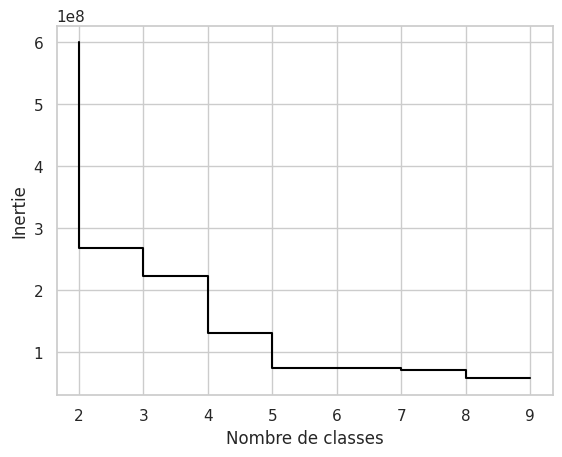

In [275]:
# Gr

last = Z[-8:, 2]

last_rev = last[::-1]

idxs = np.arange(2, len(last) + 2)

plt.step(idxs, last_rev, c="black")

plt.xlabel("Nombre de classes")
plt.ylabel("Inertie")



On a un bond d'inertie a deux classers et a 4 classe, en dessous de 4  la distance entre les classes n'est pas sgnificative, on va donc partioner notre ensemble en 4 groupes.

In [276]:
cah4 = AgglomerativeClustering(n_clusters=4, linkage="ward")
cah4.fit(X)

AgglomerativeClustering(n_clusters=4)

In [277]:
# A chaque individus on lui assigne un cluster ( ici un chiffre 0,1 ,2,3) , pour chaque cluster.

cah4.labels_


array([3, 3, 1, 3, 0, 3, 1, 3, 3, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 0, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       3, 1, 1, 1, 3, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 3, 1, 3,
       2, 1, 1, 1, 0, 3, 1, 1, 3, 1, 0, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 3,
       1, 1, 3, 0, 3, 1, 1, 0, 1, 1, 0, 1])

In [278]:
np.unique(cah4.labels_, return_counts = True)

(array([0, 1, 2, 3]), array([ 14, 116,   3,  33]))

Ici on retrouve bien un cluster , le cluster 2 qui est composé de 3 pays seulement, comme on pouvait l'oserver sur le 2eme dendrogramme. 

L'indice de Davies-Bouldin (DBI) est une mesure de qualité des clusters dans une méthode de clustering. Plus l'indice DBI est petit, meilleure est la séparation des clusters.

In [279]:
from sklearn.metrics import davies_bouldin_score
db = davies_bouldin_score(X, cah4.labels_)
print("Indice de Davies-Bouldin :", db)

Indice de Davies-Bouldin : 0.4843819487977157



L'indice de Davies-BOuldin pouir 4 clusters est relativement faible. Il indique une bonne séparation des clusters. 

---

## Nous pouvons continuer avec  l'analyse de ces clusters.

In [280]:

X_dend = df2
X_dend['cluster'] = cah4.labels_



In [281]:
#sns.pairplot(X_dend, hue="cluster")

In [282]:
# On ajoute au données normalisé le clusters correspondant pour chaque pays

X_dend = pd.DataFrame(X_scaled, columns=[features])
X_dend.set_index(Y, inplace=True)
X_dend['cluster'] = cah4.labels_
X_dend

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,Stabilite Poilitique,cluster
Zone,,,,,,,,
Afghanistan,-1.197123,-0.481684,-0.316703,-0.318370,-0.509153,0.301161,-3.032804,3
Afrique du Sud,0.998626,2.391390,0.032636,2.289683,1.827361,0.822078,-0.242099,3
Albanie,-0.243874,-0.495624,-0.316703,-0.269973,-0.530536,-0.539099,0.488800,1
Algérie,-0.885373,-0.175000,-0.316703,-0.463560,-0.157036,0.429244,-0.950849,3
Allemagne,-0.043969,1.863057,3.265408,4.053479,1.609248,1.467103,0.721359,0
...,...,...,...,...,...,...,...,...
Égypte,-0.462421,1.181381,-0.311158,0.117202,1.044721,1.813755,-1.504560,0
Émirats arabes unis,1.498712,0.013193,0.204533,1.854111,-0.480641,-0.373043,0.754582,1
Équateur,-0.054253,-0.085783,-0.316703,-0.474315,-0.064374,-0.189505,-0.009540,1


In [283]:
X_dend.columns = X_dend.columns.get_level_values(0)

In [284]:
# On regroupoe selon la moyenne pour analyser l individu moyen de chaque cluster
X_dend_mean = X_dend.groupby('cluster').mean()


<Axes: ylabel='cluster'>

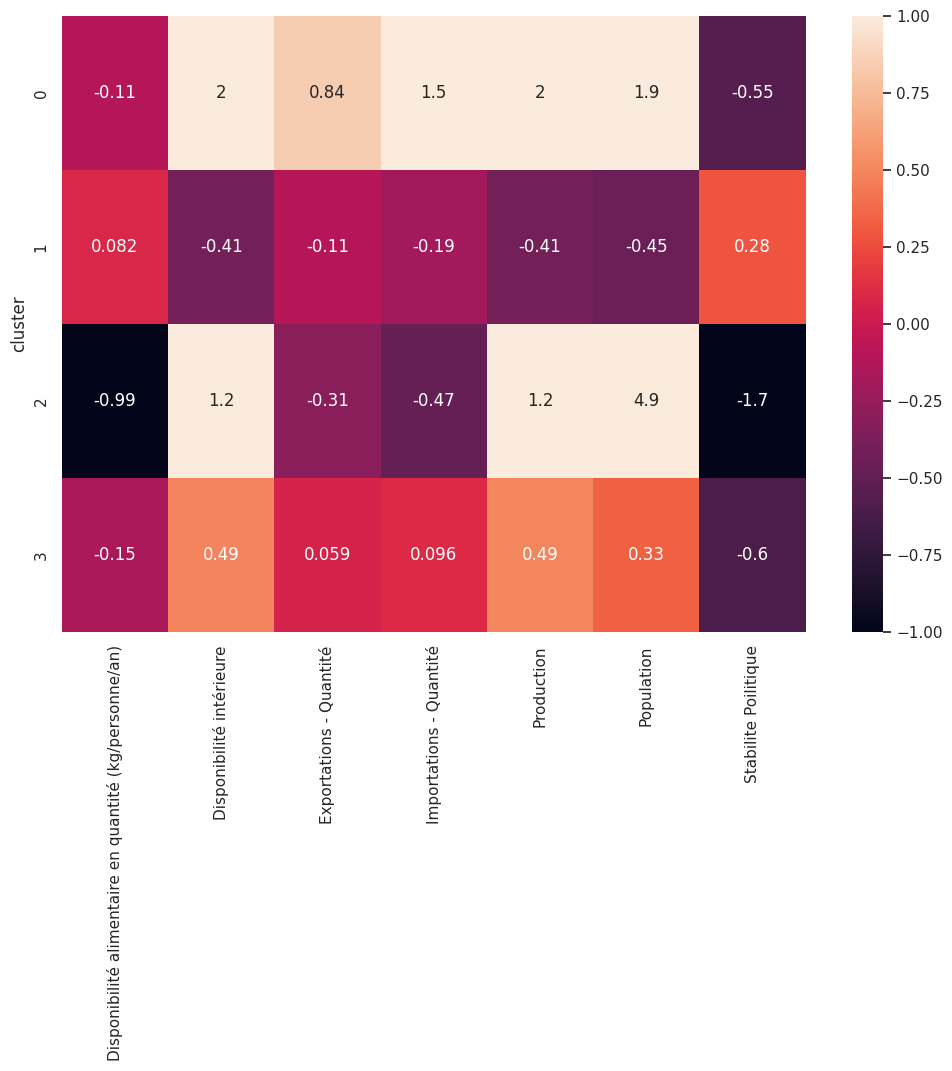

In [285]:
# Visualisation avec heatmap de chaque 'individus moyen' des clusters

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(X_dend_mean,annot=True, vmin=-1, vmax=1)

SELON ANALYSE 

In [286]:
# Cette fois ci on ajoute le clustering sur les données réelles pour finir l'analyse avec la methode dendrogramme

df_dend = df2
df_dend["cluster"] = cah4.labels_


In [287]:
# on selectione les clusters qui nous interesse

df_dend = df_dend.loc[(df_dend['cluster'] == 3) | (df_dend['cluster'] == 0) ]
df_dend.head(20)

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,Stabilite Poilitique,cluster
Zone,,,,,,,,
Afghanistan,1530.0,57000.0,0.0,29000.0,28000.0,36296113.0,-2.80,3
Afrique du Sud,35690.0,2118000.0,63000.0,514000.0,1667000.0,57009756.0,-0.28,3
Algérie,6380.0,277000.0,0.0,2000.0,275000.0,41389189.0,-0.92,3
Allemagne,19470.0,1739000.0,646000.0,842000.0,1514000.0,82658409.0,0.59,0
Angola,10560.0,319000.0,0.0,277000.0,42000.0,29816766.0,-0.38,3
Arabie saoudite,43360.0,1435000.0,10000.0,722000.0,616000.0,33101179.0,-0.64,3
Argentine,42240.0,1962000.0,207000.0,8000.0,2161000.0,43937140.0,0.17,3
Australie,47650.0,1171000.0,42000.0,16000.0,1269000.0,24584620.0,0.90,3
Bangladesh,1500.0,250000.0,-1000.0,0.0,249000.0,159685424.0,-1.26,0


In [288]:
# ON affine nos pays cilbe en selectionnant ceux avec une meilleur stabilité politique

df_dend_pays_cible = df_dend.loc[(df_dend['Stabilite Poilitique'] >= 0)].sort_values(by= 'Disponibilité alimentaire en quantité (kg/personne/an)')
len(df_dend_pays_cible.index)

15

In [289]:
df_dend_pays_cible

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,Stabilite Poilitique,cluster
Zone,,,,,,,,
Ghana,7240.0,211000.0,0.0,151000.0,60000.0,29121465.0,0.09,3
Viet Nam,12330.0,1206000.0,1000.0,291000.0,918000.0,94600648.0,0.23,0
République de Corée,16700.0,854000.0,6000.0,137000.0,838000.0,51096415.0,0.39,3
Japon,18500.0,2415000.0,10000.0,1069000.0,2215000.0,127502725.0,1.11,0
Italie,18880.0,1173000.0,183000.0,97000.0,1315000.0,60673701.0,0.31,3
Allemagne,19470.0,1739000.0,646000.0,842000.0,1514000.0,82658409.0,0.59,0
France,22900.0,1573000.0,501000.0,506000.0,1750000.0,64842509.0,0.28,0
Pologne,30300.0,1156000.0,1025000.0,55000.0,2351000.0,37953180.0,0.52,3
Espagne,30390.0,1497000.0,212000.0,205000.0,1515000.0,46647428.0,0.28,3


# K-MEANS

texte

## Nombre de clustrer

Il existe differentes methodes pour determiner le nombre de cluster a utilisé pour l'agorithme k-means.

- methode du coude

- silhouette score

-

In [290]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 15)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X_scaled)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

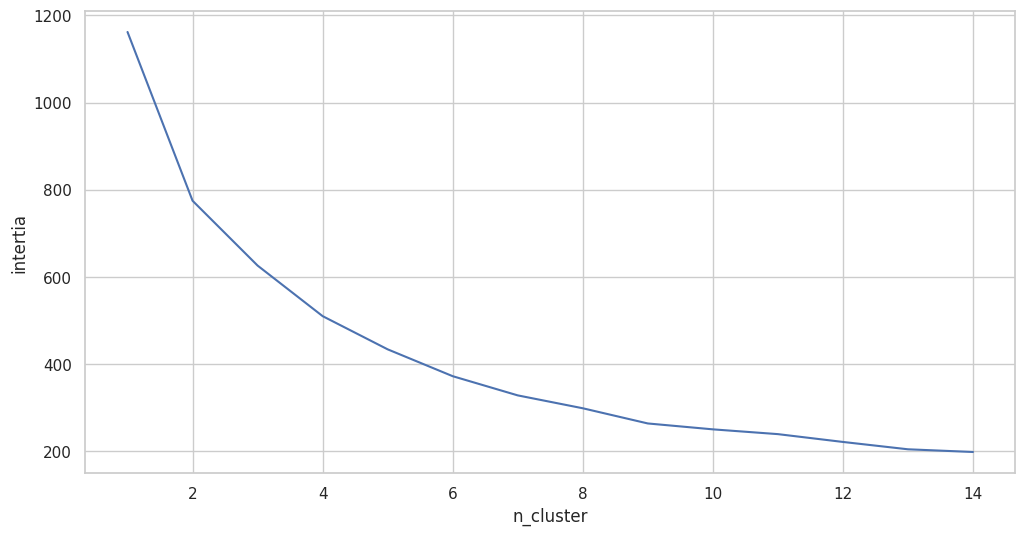

In [291]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [292]:
# on calcul egelement le score Bouldin pour choisir le nombre de cluster.

def calc_db_score(X, n_clusters):
    db_scores = []
    for n in range(2, n_clusters+1):
        kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
        labels = kmeans.labels_
        db_scores.append(davies_bouldin_score(X, labels))
        print("Davies-Bouldin score for {} clusters: {:.3f}".format(n, db_scores[-1]))
    return db_scores

In [293]:
calc_db_score(X_scaled, n_clusters = 10 )


Davies-Bouldin score for 2 clusters: 1.181
Davies-Bouldin score for 3 clusters: 1.094
Davies-Bouldin score for 4 clusters: 1.156
Davies-Bouldin score for 5 clusters: 1.072
Davies-Bouldin score for 6 clusters: 1.004
Davies-Bouldin score for 7 clusters: 1.039
Davies-Bouldin score for 8 clusters: 1.011
Davies-Bouldin score for 9 clusters: 1.049
Davies-Bouldin score for 10 clusters: 1.030


[1.1806023243792152,
 1.0935417283167965,
 1.1561099587422228,
 1.0719541409476983,
 1.004069661000824,
 1.0392565973195473,
 1.011331069314731,
 1.0494655508525936,
 1.0301896103084518]

Le score de Davies-Bouldin est plus petit pour 3 cluster s

SELON ANALYSE

La methode du coude, nous permet donc de choisir notre nombre de cluster en observant un 'coude' dans la courbe d'inertie.

Ici, on peut voir deux coudes, a 2 et 4 cluster.

---

Essayons ensuite la métgode du silhouette score

Le nombre optimal de clusters est déterminé en cherchant le score de silhouette maximum pour différentes valeurs de k. Plus le score est proche de 1 mieux est la répartition à l'inverse lorsque le score est proche de -1.

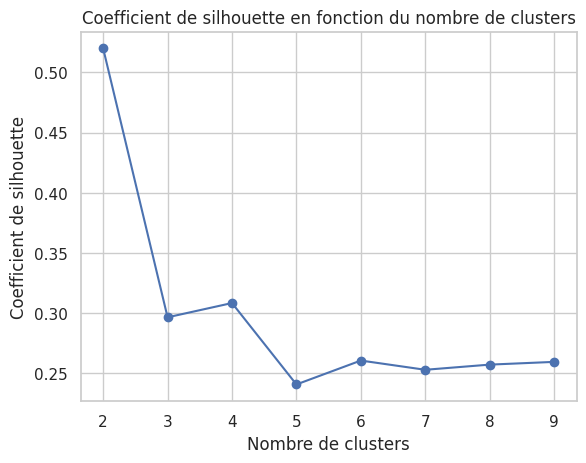

In [294]:
# Methode des silhouettes

from sklearn import metrics

silhouettes = []

for num_clusters in range(2,10) :
  
  cls = KMeans(n_clusters = num_clusters, n_init=1, init ='random')
  cls.fit(X_scaled)
  silh = metrics.silhouette_score(X_scaled, cls.labels_)
  silhouettes.append(silh)

# On affiche le graphique
plt.plot(range(2, 10), silhouettes, marker="o")
plt.xlabel("Nombre de clusters")
plt.ylabel("Coefficient de silhouette")
plt.title("Coefficient de silhouette en fonction du nombre de clusters")
plt.show()

SELON ANALYSE

Le silouhette score nous indique lui 2 cluster

Le nombre optimal de clusters est déterminé en cherchant le score de silhouette maximum pour différentes valeurs de k.

In [295]:
def plot_kmeans_clusters(X, n_clusters_list):
    """
    Generates a figure with the different projections of the individuals on the PCA axes for 
    n values of k-means clusters with the clusters in color.
    
    Args:
    - X : input data, a pandas DataFrame or a numpy array
    - n_clusters_list : a list of integers representing the number of clusters to test
    
    Returns:
    - None
    """
    
    # Check if input data is a pandas DataFrame, and convert it to a numpy array if it is
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    
    # Perform PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Plot the PCA projections for each value of k-means clusters
    fig, axes = plt.subplots(1, len(n_clusters_list), figsize=(15, 5))
    
    for i, n_clusters in enumerate(n_clusters_list):
        # Perform k-means clustering
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X)
        
        # Plot the PCA projections with the clusters in color
        cluster_labels = kmeans.labels_
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, ax=axes[i])
        axes[i].set_title('k-means with {} clusters'.format(n_clusters))
    
    plt.show()

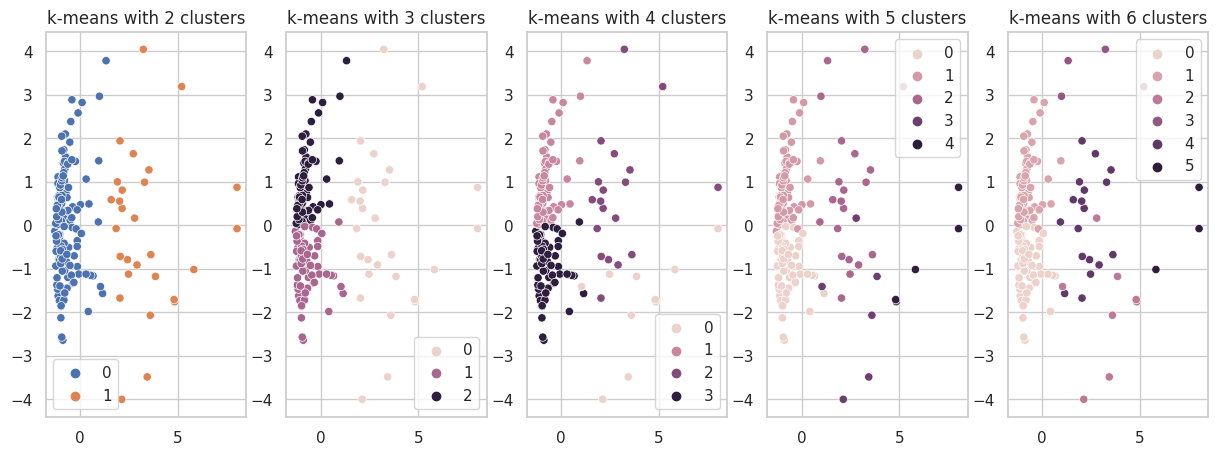

In [296]:
plot_kmeans_clusters(X_scaled, [2,3,4,5,6])

A l'allure des projections des individus je décide de prendre 3 clusters pour la suite de l'analyse.

## Calculs  des clusters

In [297]:
kmeans = KMeans(n_clusters=6)

In [298]:
kmeans.fit(X_scaled)

KMeans(n_clusters=6)

In [299]:
# Calcul de cluster et assignement 
cluster_k = kmeans.labels_
cluster_k


array([2, 4, 0, 2, 3, 2, 0, 4, 4, 2, 0, 0, 2, 0, 5, 0, 3, 0, 0, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 4, 0, 3, 0, 0, 0, 4, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       4, 0, 2, 0, 0, 3, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 5, 4,
       2, 0, 0, 0, 4, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 4,
       2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 4, 0, 2, 2, 5, 0, 0, 0, 2, 0, 2,
       5, 0, 2, 3, 4, 3, 0, 0, 4, 2, 4, 2, 2, 4, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 3, 2, 2, 0, 2, 2, 4, 4,
       0, 0, 2, 4, 2, 2, 2, 4, 0, 2, 2, 2], dtype=int32)

In [300]:
np.unique(cluster_k, return_counts = True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([61,  3, 73,  7, 18,  4]))

## Calcul des centroides

In [301]:
#centroids = cls.cluster_centers_
#centroids_proj = pca.transform(centroids)
#centroids_proj = pd.DataFrame(centroids_proj, 
                              #columns = ["F1", "F2"], 
                              #index=["cluster_0", "cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5"])

In [302]:
centroids = kmeans.cluster_centers_

centroids

array([[ 0.76175537, -0.35539971, -0.19298474, -0.21663929, -0.35857953,
        -0.49677571,  0.82592883],
       [ 0.46147352,  4.63855008, -0.06902379,  3.58922803,  4.1591225 ,
         2.72314409, -0.05383675],
       [-0.73157999, -0.40113658, -0.29566243, -0.2858841 , -0.4255712 ,
        -0.20372252, -0.55430076],
       [ 0.28495287,  0.66419999,  4.20252339,  2.02849357,  1.25896467,
         0.43171261,  0.51411285],
       [ 0.43004854,  1.61035212,  0.29972293,  0.61102915,  1.56101636,
         0.87389122, -0.37745025],
       [-1.04542573,  0.85274115, -0.31254449, -0.47028199,  0.88790847,
         4.56339994, -1.64021966]])

In [303]:
#Centroides  
centroids_scaled = pca.transform(centroids)
centroids_scaled

array([[-0.74223314, -1.04080751, -0.4245341 , -0.06707998],
       [ 7.30586305, -0.07707796, -1.40437756,  1.6790912 ],
       [-0.73471757,  0.84907202,  0.28065881,  0.13484568],
       [ 3.10047341, -1.96649252,  3.17230416, -0.79322099],
       [ 2.47433037,  0.08479094, -0.54444237, -0.18877505],
       [ 2.68793863,  3.49436123, -0.69613664, -0.45965798]])

In [304]:

centroids_scaled2 = scaler.fit_transform(centroids)
centroids_scaled2

array([[ 1.0989335 , -0.89530301, -0.49227442, -0.7389959 , -1.00550474,
        -1.01564745,  1.30472472],
       [ 0.64989731,  2.03922492, -0.4158357 ,  1.83508669,  1.94602503,
         0.78910527,  0.2012577 ],
       [-1.1341739 , -0.92217875, -0.55558912, -0.78582933, -1.04927211,
        -0.85139226, -0.42646124],
       [ 0.38593144, -0.29616927,  2.21815183,  0.7794904 ,  0.05127807,
        -0.4952333 ,  0.91362207],
       [ 0.60290495,  0.25980545, -0.18845339, -0.17920578,  0.24861613,
        -0.24739388, -0.20464227],
       [-1.6034933 , -0.18537935, -0.5659992 , -0.91054609, -0.19114239,
         1.82056162, -1.78850099]])

In [305]:
centroids_proj = pd.DataFrame(centroids_scaled, 
                              columns = ["F1", "F2", "F3", "F4"], 
                              index=["cluster_0", "cluster_1","cluster_2",'cluster_3','cluster_4','cluster_5'])

centroids_proj

,F1,F2,F3,F4
cluster_0,-0.742233,-1.040808,-0.424534,-0.067080
cluster_1,7.305863,-0.077078,-1.404378,1.679091
cluster_2,-0.734718,0.849072,0.280659,0.134846
cluster_3,3.100473,-1.966493,3.172304,-0.793221
cluster_4,2.474330,0.084791,-0.544442,-0.188775
cluster_5,2.687939,3.494361,-0.696137,-0.459658


In [306]:
# POur pouvoir importer les donéens dans un dataframe
data = np.array([X_proj['F1'].values, X_proj['F2'].values]).T


In [307]:
# Les centroides avec les axes F1 F2 poru la représentation graphique
X_proj_kmeans = pd.DataFrame(data, columns =['F1' , "F2"], index = df2.index)
X_proj_kmeans["cluster"] = cluster_k
X_proj_kmeans

,F1,F2,cluster
Zone,,,
Afghanistan,-0.426361,2.883128,2
Afrique du Sud,3.624242,-0.679380,4
Albanie,-1.042124,-0.213709,0
Algérie,-0.246335,1.467781,2
Allemagne,4.847249,-1.762733,3
...,...,...,...
Égypte,2.041011,1.938219,4
Émirats arabes unis,0.414222,-1.986915,0
Équateur,-0.431761,0.170041,2


## Représentation graphique
Prjection des point sur les CP.

<Axes: title={'center': 'Projection des individus (clusters K-means)'}, xlabel='F1 (43.5%)', ylabel='F2 (24.6%)'>

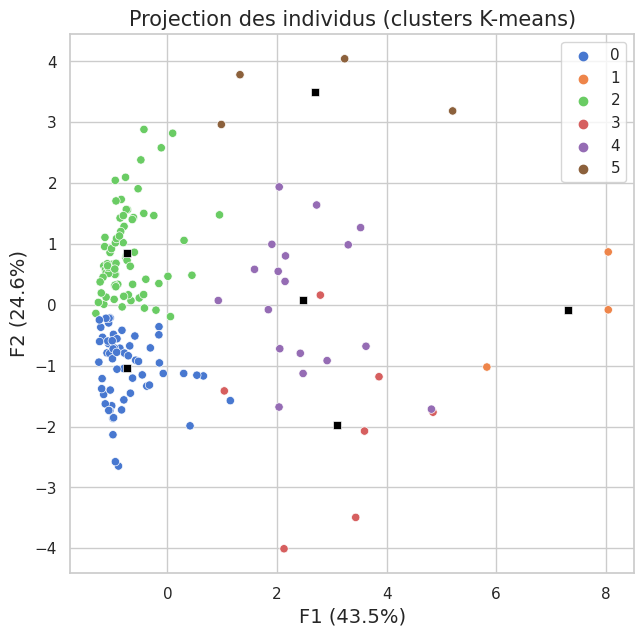

In [308]:

#Projections avec les clusters du K-means
plt.figure(figsize=(16,7))
plt.subplot(122)
plt.title("Projection des individus (clusters K-means)", fontsize=15)

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize= 14)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize= 14)



sns.scatterplot(data= X_proj_kmeans, x="F1", y="F2", hue="cluster", palette="muted") # Nuage des individus
sns.scatterplot(data= centroids_proj, x="F1", y="F2", marker="s", color="black", s=33) # On affiche les centroïdes


## Analyse des clusters /centroides

L'analyse des centroides permet d'analyser les clusters selon les varialbes de bases et donc pouvoir choisir les clusters les plus interessant pour la societe

In [309]:
df_centroids = pd.DataFrame(centroids_scaled2, 
                              columns = df2.iloc[1:, :7].columns, 
                              index=["0", "1", "2","3","4","5"])
df_centroids

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,Stabilite Poilitique
0,1.098934,-0.895303,-0.492274,-0.738996,-1.005505,-1.015647,1.304725
1,0.649897,2.039225,-0.415836,1.835087,1.946025,0.789105,0.201258
2,-1.134174,-0.922179,-0.555589,-0.785829,-1.049272,-0.851392,-0.426461
3,0.385931,-0.296169,2.218152,0.779490,0.051278,-0.495233,0.913622
4,0.602905,0.259805,-0.188453,-0.179206,0.248616,-0.247394,-0.204642
5,-1.603493,-0.185379,-0.565999,-0.910546,-0.191142,1.820562,-1.788501


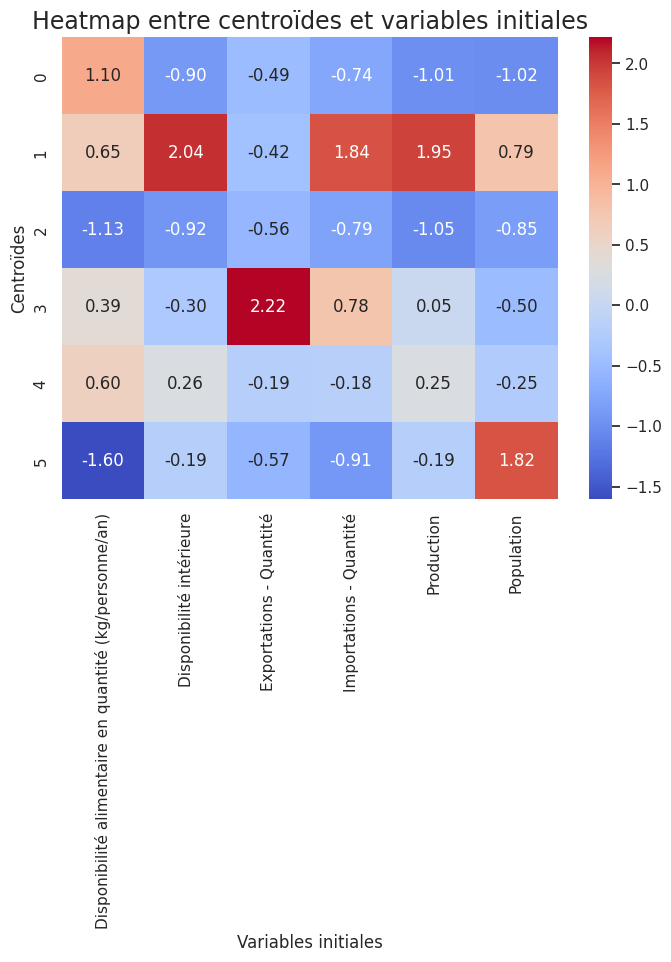

In [310]:
# Création heatmap entre centroïdes et variables initiales

plt.figure(figsize=(8, 6))

sns.heatmap(df_centroids.iloc[:,:6], annot=True, cmap="coolwarm", fmt="0.2f")
plt.title("Heatmap entre centroïdes et variables initiales", fontsize=17)
plt.xlabel("Variables initiales", fontsize=12)
plt.ylabel("Centroïdes", fontsize=12)
plt.show()

Sur les données centrées

In [311]:
df_kmeans_scaled = pd.DataFrame(X_scaled, columns=[features])
df_kmeans_scaled.set_index(Y, inplace=True)
df_kmeans_scaled['cluster'] = cluster_k
df_kmeans_scaled

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,Stabilite Poilitique,cluster
Zone,,,,,,,,
Afghanistan,-1.197123,-0.481684,-0.316703,-0.318370,-0.509153,0.301161,-3.032804,2
Afrique du Sud,0.998626,2.391390,0.032636,2.289683,1.827361,0.822078,-0.242099,4
Albanie,-0.243874,-0.495624,-0.316703,-0.269973,-0.530536,-0.539099,0.488800,0
Algérie,-0.885373,-0.175000,-0.316703,-0.463560,-0.157036,0.429244,-0.950849,2
Allemagne,-0.043969,1.863057,3.265408,4.053479,1.609248,1.467103,0.721359,3
...,...,...,...,...,...,...,...,...
Égypte,-0.462421,1.181381,-0.311158,0.117202,1.044721,1.813755,-1.504560,4
Émirats arabes unis,1.498712,0.013193,0.204533,1.854111,-0.480641,-0.373043,0.754582,0
Équateur,-0.054253,-0.085783,-0.316703,-0.474315,-0.064374,-0.189505,-0.009540,2


In [312]:
df_kmeans_scaled.columns = df_kmeans_scaled.columns.get_level_values(0)

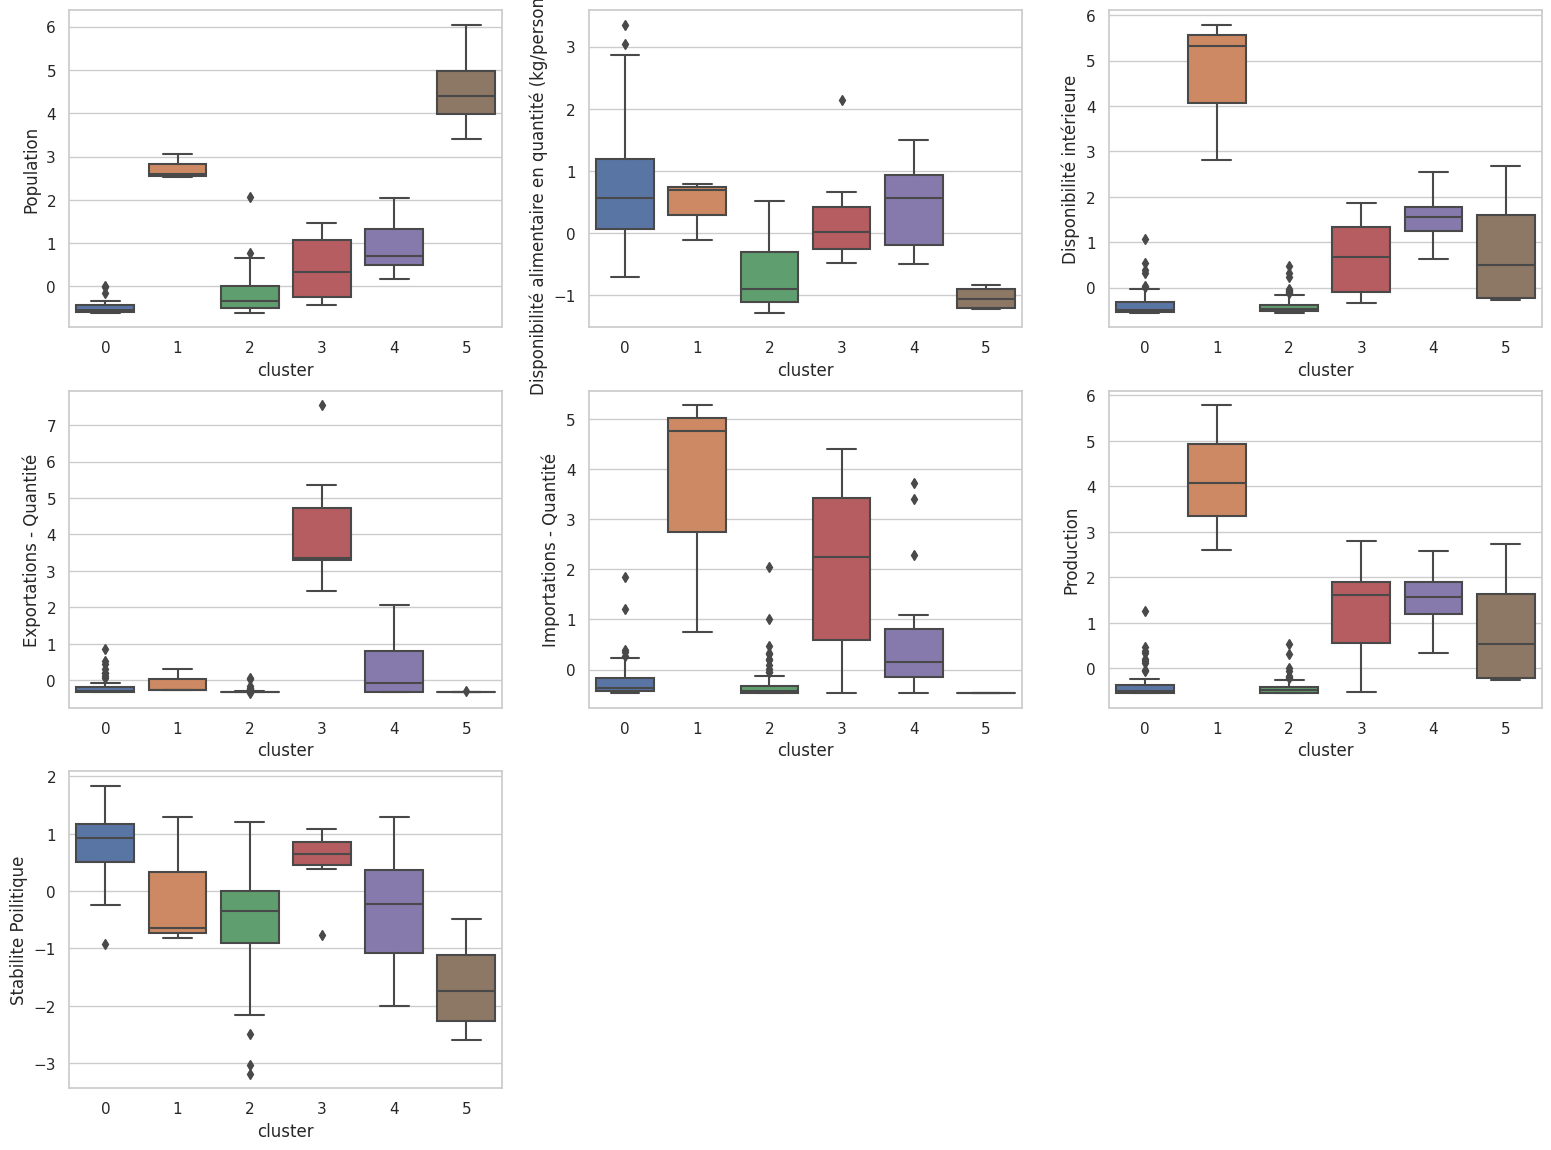

In [313]:
# Création de boxplot
plt.figure(figsize=(19, 14))

sns.set(style="whitegrid")

plt.subplot(331)
sns.boxplot(data=df_kmeans_scaled, x="cluster", y="Population")

plt.subplot(332)
sns.boxplot(data=df_kmeans_scaled, x="cluster", y="Disponibilité alimentaire en quantité (kg/personne/an)")

plt.subplot(333)
sns.boxplot(data=df_kmeans_scaled, x="cluster", y="Disponibilité intérieure")

plt.subplot(334)
sns.boxplot(data=df_kmeans_scaled, x="cluster", y="Exportations - Quantité")

plt.subplot(335)
sns.boxplot(data=df_kmeans_scaled, x="cluster", y="Importations - Quantité")

plt.subplot(336)
sns.boxplot(data=df_kmeans_scaled, x="cluster", y="Production")

plt.subplot(337)
sns.boxplot(data=df_kmeans_scaled, x="cluster", y="Stabilite Poilitique")

plt.show()

---

Les clusters 3 et 1 sont les plus importateurs

- Le cluster 3 a aussi une bonne stabilité politique, malgré la forte production , ils importent beaucoup, cela peut etre du a la population importante des ces pays.

- Le cluster 5 a une forte population et une disponibilité par personnne assez faible, il peut etre interessant de les voir comme pays potentiel egalement.

Sur les données réelles

In [314]:
df_kmeans = df2
df_kmeans["cluster"] = cluster_k
df_kmeans.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,Stabilite Poilitique,cluster
Zone,,,,,,,,
Afghanistan,1530.0,57000.0,0.0,29000.0,28000.0,36296113.0,-2.80,2
Afrique du Sud,35690.0,2118000.0,63000.0,514000.0,1667000.0,57009756.0,-0.28,4
Albanie,16360.0,47000.0,0.0,38000.0,13000.0,2884169.0,0.38,0
Algérie,6380.0,277000.0,0.0,2000.0,275000.0,41389189.0,-0.92,2
Allemagne,19470.0,1739000.0,646000.0,842000.0,1514000.0,82658409.0,0.59,3


In [315]:
df_kmeans_pays_cible = df_kmeans.loc[(df_kmeans['cluster'] == 3) | (df_kmeans['cluster'] == 1)]

df_kmeans_pays_cible 

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,Stabilite Poilitique,cluster
Zone,,,,,,,,
Allemagne,19470.0,1739000.0,646000.0,842000.0,1514000.0,82658409.0,0.59,3
Belgique,12650.0,152000.0,656000.0,338000.0,463000.0,11419748.0,0.43,3
Chine - RAS de Hong-Kong,53510.0,280000.0,663000.0,907000.0,24000.0,7306322.0,0.83,3
France,22900.0,1573000.0,501000.0,506000.0,1750000.0,64842509.0,0.28,3
Fédération de Russie,30980.0,4556000.0,115000.0,226000.0,4444000.0,145530082.0,-0.64,1
Japon,18500.0,2415000.0,10000.0,1069000.0,2215000.0,127502725.0,1.11,1
Mexique,32520.0,4219000.0,9000.0,972000.0,3249000.0,124777324.0,-0.80,1
Pays-Bas,20330.0,372000.0,1418000.0,608000.0,1100000.0,17021347.0,0.92,3
Pologne,30300.0,1156000.0,1025000.0,55000.0,2351000.0,37953180.0,0.52,3


In [316]:

df_kmeans_pays_cible =df_kmeans_pays_cible.loc[df_kmeans_pays_cible['Stabilite Poilitique'] >= -0.5] 
df_kmeans_pays_cible.sort_values(by = 'Disponibilité alimentaire en quantité (kg/personne/an)')


,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,Stabilite Poilitique,cluster
Zone,,,,,,,,
Belgique,12650.0,152000.0,656000.0,338000.0,463000.0,11419748.0,0.43,3
Japon,18500.0,2415000.0,10000.0,1069000.0,2215000.0,127502725.0,1.11,1
Allemagne,19470.0,1739000.0,646000.0,842000.0,1514000.0,82658409.0,0.59,3
Pays-Bas,20330.0,372000.0,1418000.0,608000.0,1100000.0,17021347.0,0.92,3
France,22900.0,1573000.0,501000.0,506000.0,1750000.0,64842509.0,0.28,3
Pologne,30300.0,1156000.0,1025000.0,55000.0,2351000.0,37953180.0,0.52,3
Chine - RAS de Hong-Kong,53510.0,280000.0,663000.0,907000.0,24000.0,7306322.0,0.83,3


In [317]:
# Les pays cibles avec le dendrogramme
df_dend_pays_cible

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population,Stabilite Poilitique,cluster
Zone,,,,,,,,
Ghana,7240.0,211000.0,0.0,151000.0,60000.0,29121465.0,0.09,3
Viet Nam,12330.0,1206000.0,1000.0,291000.0,918000.0,94600648.0,0.23,0
République de Corée,16700.0,854000.0,6000.0,137000.0,838000.0,51096415.0,0.39,3
Japon,18500.0,2415000.0,10000.0,1069000.0,2215000.0,127502725.0,1.11,0
Italie,18880.0,1173000.0,183000.0,97000.0,1315000.0,60673701.0,0.31,3
Allemagne,19470.0,1739000.0,646000.0,842000.0,1514000.0,82658409.0,0.59,0
France,22900.0,1573000.0,501000.0,506000.0,1750000.0,64842509.0,0.28,0
Pologne,30300.0,1156000.0,1025000.0,55000.0,2351000.0,37953180.0,0.52,3
Espagne,30390.0,1497000.0,212000.0,205000.0,1515000.0,46647428.0,0.28,3


# Conclusion 

Les deux méthode de clustering, sont donc assez pertinentes,

ON retoruve certains pays dans les deux methodes : Le  Japon , l'Allemagne , le Royaume-Uni et Pologne 

Il y a moins de pays cilbe lorsque l'on a utilisé la méthode des K-means, car le choix que j'ai fais pour le nombre de cluster a affiné les classes. 

On pourra toujours voir les pays non en communs des deux analyses des clusters commme des pays cilbe.

ON choisira de préférence des pays porche de la France donc, l'Allemagne, le RU , et la POlogne sont les canditats idéaux pour une expansion vers l'international pour la Poule qui chante.
